In [27]:
import requests
import json
import random

import multiprocessing

import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import seaborn as sns

### load data

In [1]:
file_location = './data/vectors.csv'

In [15]:
items = []
vectors = []

with open(file_location, 'r') as f:
    contents = f.readlines()
            
for l in contents:
    l = l.split(',')
    items.append(l[0])
    vectors.append(list(map(float, l[1:])))
    
vectors = np.array(vectors)

### clustering

In [34]:
# pca = PCA(n_components=2)
# compressed = pca.fit_transform(vectors)

tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=100)
compressed = tsne.fit_transform(vectors)

In [92]:
dbscan = DBSCAN(eps=2, min_samples=2)
cluster = dbscan.fit_predict(vectors)

In [93]:
np.unique(cluster)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

<AxesSubplot:>

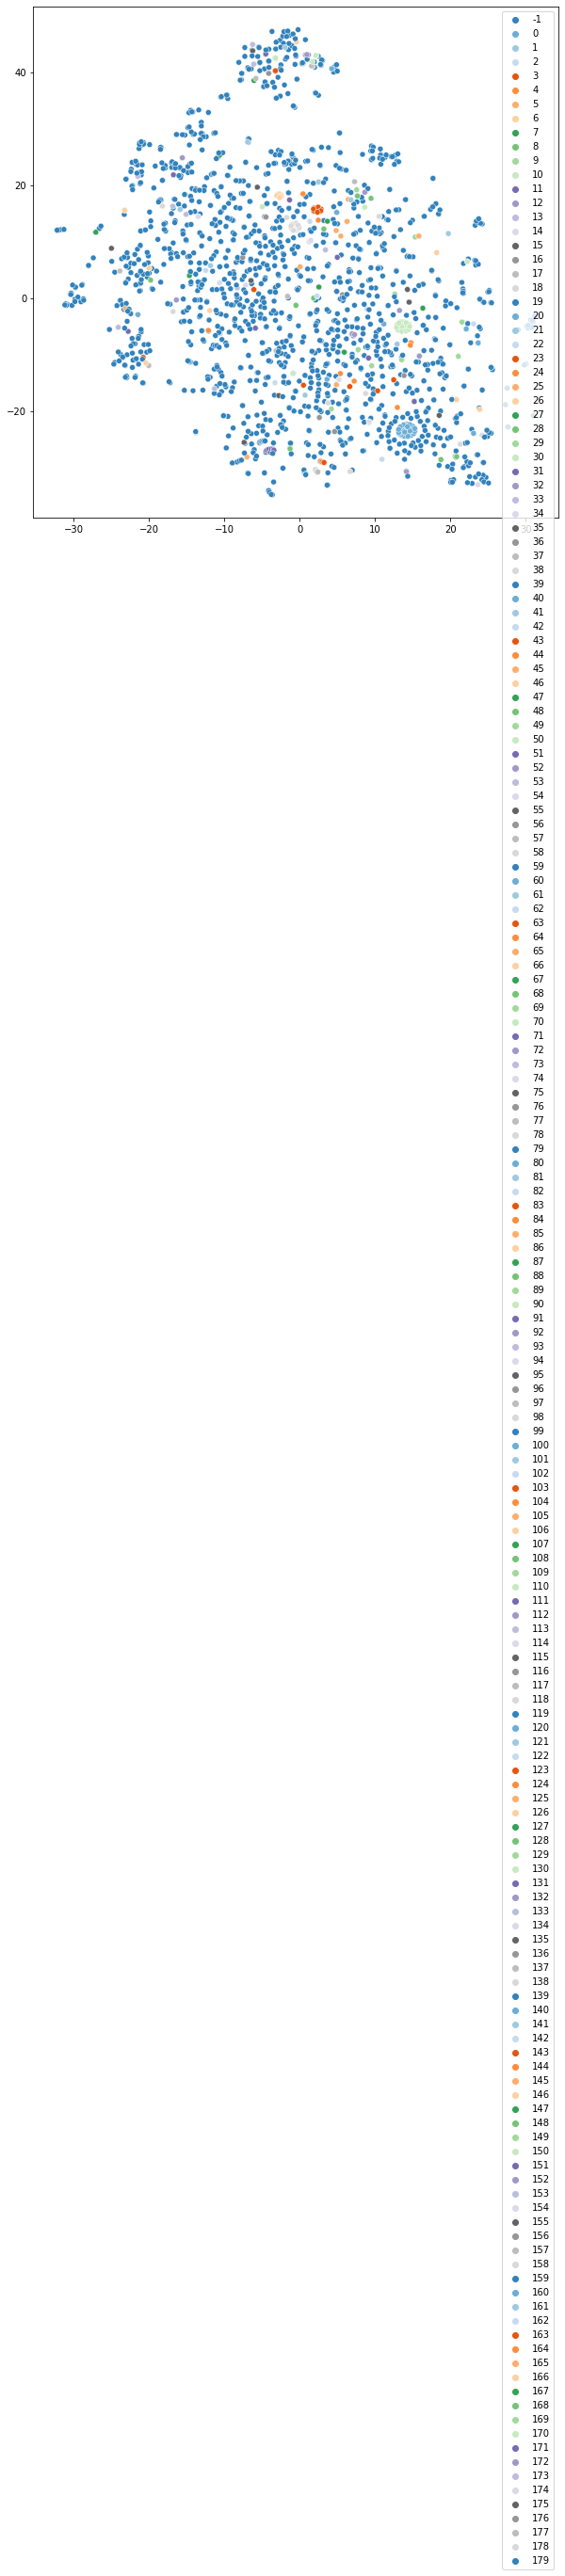

In [94]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(x=compressed[:, 0], y=compressed[:, 1], hue=cluster, palette='tab20c', ax=ax, legend='auto')